# Generación de un modelo para clasificar los dígitos MNIST

---
### Preparación de Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

# %% Carga y perparación de datos de entrenamiento y testeo

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

# normalización
X_train = X_train / 255
X_test  = X_test  / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


 ### Muestra ejemplos del dataset

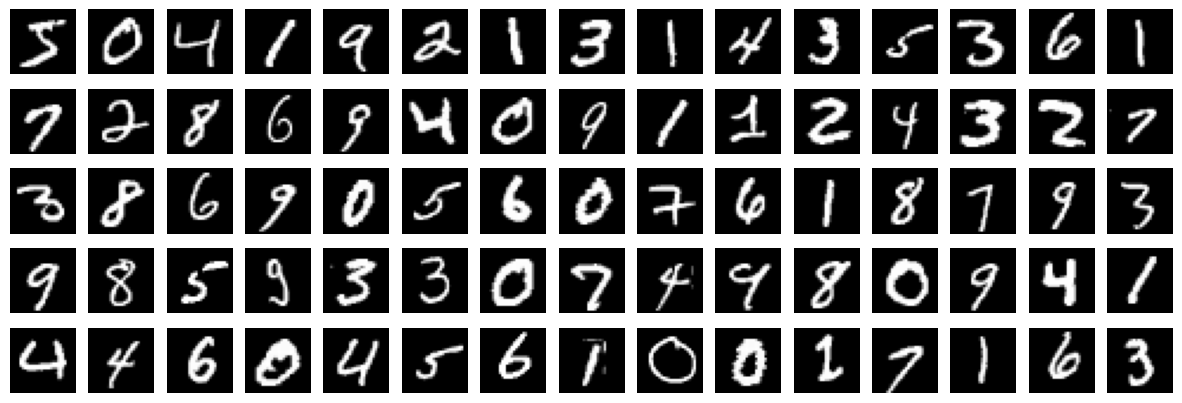

In [ ]:
# Crear una figura para mostrar las imágenes en una matriz de 10x5
(FILAS, COLS) = (15, 5)
fig, axes = plt.subplots(COLS, FILAS, figsize=(15, 5))

# Iterar sobre cada imagen a visualizar
for i in range(COLS):
    for j in range(FILAS):
        # Seleccionar la imagen correspondiente
        img = X_train[i * FILAS + j]
        # Mostrar la imagen en la posición correspondiente de la matriz
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')  # Ocultar los ejes

### Generación del Modelo

In [ ]:
# Construccion del modelo
PADDING='same'
#ACTIV='LeakyReLU'
ACTIV='relu'

model = Sequential()

model.add(Input( (*IMG_SHAPE, 1) ))
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation=ACTIV))
model.add(Dense(TARGET_CNT, activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.0001)
#optimizer = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,874 (237.79 KB)

 Trainable params: 60,874 (237.79 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del Modelo

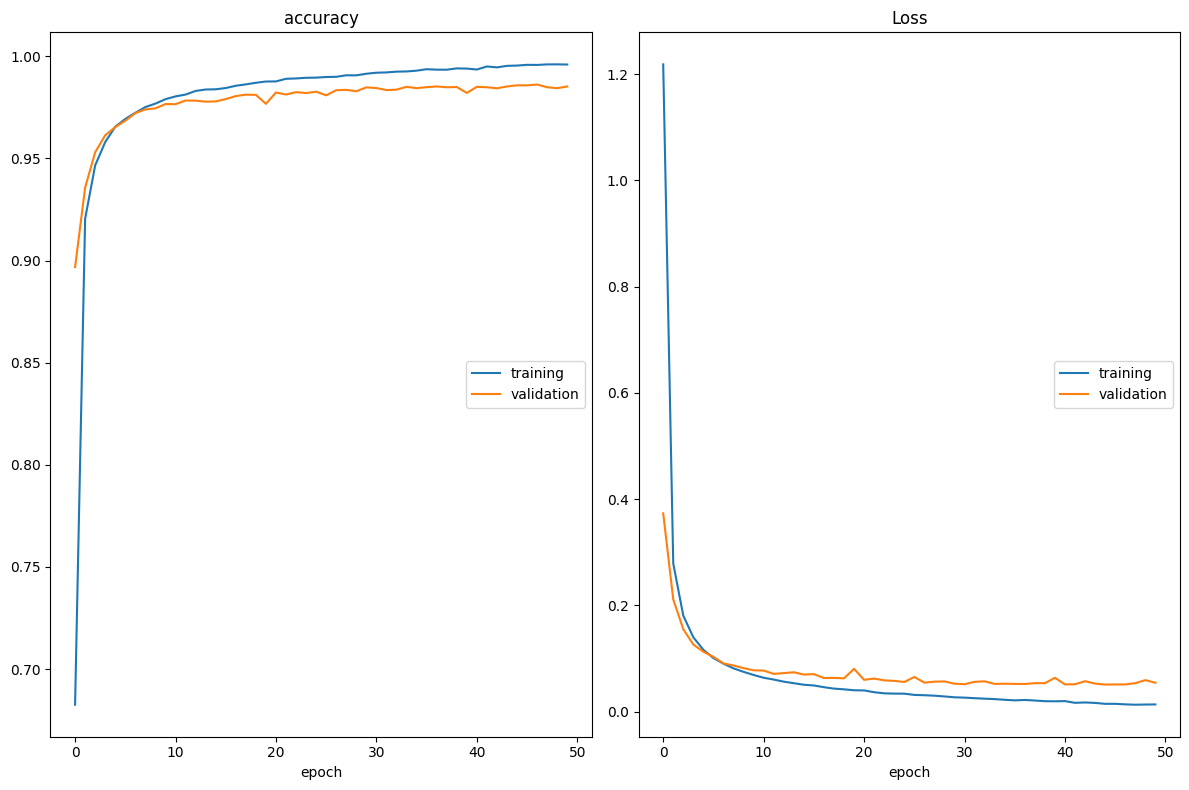

accuracy
	training         	 (min:    0.683, max:    0.996, cur:    0.996)
	validation       	 (min:    0.897, max:    0.986, cur:    0.985)
Loss
	training         	 (min:    0.013, max:    1.219, cur:    0.013)
	validation       	 (min:    0.051, max:    0.373, cur:    0.054)


In [ ]:
!pip install livelossplot --quiet

# paqueta para graficar en vivo las metricas durante el entrenamiento
from livelossplot import PlotLossesKeras

LOTES  = 128
EPOCAS = 50
PACIENCIA = 12

# parada temprana para evitar el sobreajuste
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True )

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.3, callbacks=[early_stop, PlotLossesKeras()], verbose=0)


### Graficos del entrenamiento. Evaluación del modelo

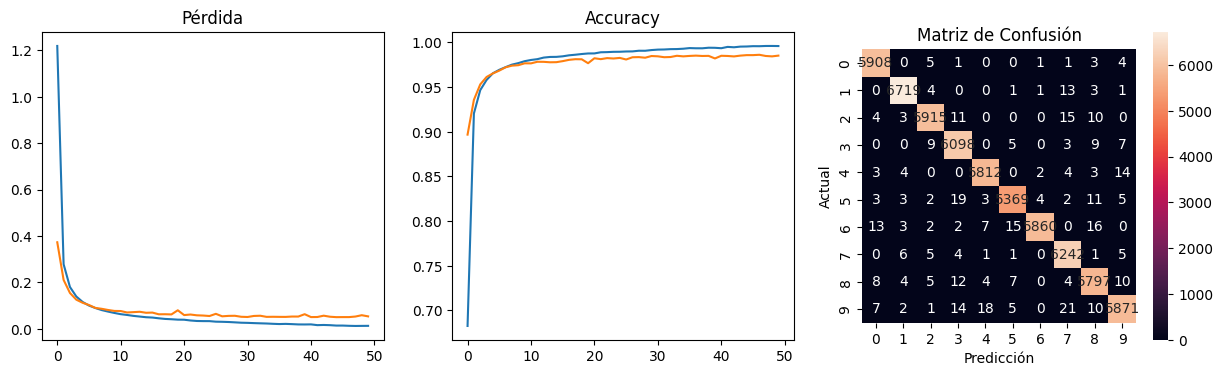


Efectividad del modelo con datos de entrenamiento:  99.60%
Efectividad del modelo con datos de validación...:  98.52%
Efectividad del modelo con datos de Prueba.......:  98.90%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Graficos de evolucion del entrenamiento
fig, axs = plt.subplots(1,3, figsize=(15,4))

axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[0].set_title('Pérdida')

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")
axs[1].set_title('Accuracy')

pred = model.predict(X_train, verbose=0)
cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))

# Gráfico de matriz de confusión con Seaborn
sns.heatmap(cm, square=True, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Matriz de Confusión')
axs[2].set_xlabel('Predicción')
axs[2].set_ylabel('Actual')

plt.show()

# Muestra los resultados de modelo para entrenamiento y validacion
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (H.history['accuracy'][-1]*100))

print("Efectividad del modelo con datos de validación...: %6.2f%%" % (H.history['val_accuracy'][-1]*100))

# evalua el modelo con los datos de prueba
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

pred = model.predict(X_test, verbose=0)
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))